#### prof. Davi rocha

Nosso objetivo neste projeto será prever se um paciente poderá ser readmitido em uma clínica no período de 30 dias após alta. Para isso, faremos a construção de diversos modelos preditivos usando registros eletrônicos de saúde de uma clínica fictícia.

Esse projeto terá como base uma pesquisa realizada em 2018, chamada:

Using Electronic Health Records and Machine Learning to Make Medical-Related Predictions from Non-Medical Data

https://ieeexplore.ieee.org/document/8614004

### Registros Eletrônicos de Saúde (Electronic Health Records)

Um Registro Eletrônico de Saúde (Electronic Health Records - EHR) é uma versão digital da ficha de papel de um paciente. Os EHRs são registros em tempo real, centrados no paciente, que tornam as informações disponíveis instantânea e seguramente para usuários autorizados. Embora um EHR contenha os históricos médicos e de tratamento dos pacientes, um sistema de EHR é construído para ir além dos dados clínicos coletados no consultório de um prestador de serviços e pode incluir uma visão mais ampla do atendimento de um paciente. Os EHRs são uma parte vital da TI em saúde e podem:

- Conter o histórico médico do paciente, diagnósticos, medicamentos, planos de tratamento, datas de imunização, alergias, imagens de radiologia e resultados laboratoriais e de testes.


- Permitir acesso a ferramentas baseadas em evidências que os provedores podem usar para tomar decisões sobre o atendimento de um paciente.


- Automatiza e simplifica o fluxo de trabalho do provedor.

Um dos principais recursos de um EHR é que as informações de saúde podem ser criadas e gerenciadas por provedores autorizados em um formato digital capaz de ser compartilhado com outros provedores em mais de uma organização de saúde. Os EHRs são construídos para compartilhar informações com outros prestadores de cuidados de saúde e organizações - como laboratórios, especialistas, instalações de imagens médicas, farmácias, instalações de emergência e clínicas de escolas e locais de trabalho - para que eles contenham informações de todos os clínicos envolvidos no atendimento de um paciente.

 ##  1) Carregando os Dados e Compreendendo as Variáveis

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.rcParams['figure.figsize'] = (16.0,4.0) #mesmo tamanho paronizado para os graficos

In [ ]:
dados = pd.read_csv('dados/dataset.csv',index_col=[0])
dados.head()

,IDADE,SEXO_F,SEXO_M,ADM_CORRENTE_DIAS,RECEB_MEDICAMENTOS,FEZ_EXAMES,DEPEND_QUIMICO,FUMANTE,ALCOOLISMO,NUM_DIAS_INT_PREVIA,ADM_PREVIA_DIAS,NUM_DIAS_LIC_MEDICA,READMISSAO_30_DIAS
ID,,,,,,,,,,,,,
0,62.0,1,0,1,0,1,0,0,0,0,0,0,1
1,24.0,0,1,2,0,0,1,0,0,0,0,0,0
2,77.0,0,1,2,0,0,1,0,0,2,2,0,0
3,68.0,0,1,7,0,0,1,0,0,2,2,0,0
4,83.0,0,1,2,0,0,1,0,0,1,1,0,0


Dicionário de Dados

- IDADE - Idade do paciente (numérica)
- SEXO_F - paciente do sexo feminino (categórica)
- SEXO_M - paciente do sexo masculino (categórica)
- ADM_CORRENTE_DIAS - Dias desde a admissão atual (numérica)
- RECEB_MEDICAMENTOS - Recebeu medicamentos na última internação (categórica)
- FEZ_EXAMES - Fez exames na última internação (categórica)
- DEPEND_QUIMICO - Dependendo químico (categórica)
- FUMANTE - Fumante (categórica)
- ALCOOLISMO - Alcoolismo (categórica)
- NUM_DIAS_INT_PREVIA - Número de internações anteriores (numérica)
- ADM_PREVIA_DIAS - Dias da admissão anterior (numérica)
- NUM_DIAS_LIC_MEDICA - Licença médica (numérica)
- READMISSAO_30_DIAS - Readmissão dentro de 30 dias após a alta. Variável target. 0 - Não / 1 - Sim

In [ ]:
# shape dos dados
dados.shape

(117180, 13)

Há 117180 linhas e 13 colunas

In [ ]:
#Tipos de dados e outras informações
dados.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 117180 entries, 0 to 129999
Data columns (total 13 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   IDADE                117180 non-null  float64
 1   SEXO_F               117180 non-null  int64  
 2   SEXO_M               117180 non-null  int64  
 3   ADM_CORRENTE_DIAS    117180 non-null  int64  
 4   RECEB_MEDICAMENTOS   117180 non-null  int64  
 5   FEZ_EXAMES           117180 non-null  int64  
 6   DEPEND_QUIMICO       117180 non-null  int64  
 7   FUMANTE              117180 non-null  int64  
 8   ALCOOLISMO           117180 non-null  int64  
 9   NUM_DIAS_INT_PREVIA  117180 non-null  int64  
 10  ADM_PREVIA_DIAS      117180 non-null  int64  
 11  NUM_DIAS_LIC_MEDICA  117180 non-null  int64  
 12  READMISSAO_30_DIAS   117180 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 12.5 MB


#### Da analise acima já concluímos que não há nulos e que  todas as nossas variaveis foram classificads como numéricas pelo pandas.

In [ ]:
#Rsumo estatistico
dados.describe()

,IDADE,SEXO_F,SEXO_M,ADM_CORRENTE_DIAS,RECEB_MEDICAMENTOS,FEZ_EXAMES,DEPEND_QUIMICO,FUMANTE,ALCOOLISMO,NUM_DIAS_INT_PREVIA,ADM_PREVIA_DIAS,NUM_DIAS_LIC_MEDICA,READMISSAO_30_DIAS
count,117180.000000,117180.000000,117180.000000,117180.000000,117180.000000,117180.000000,117180.000000,117180.000000,117180.000000,117180.000000,117180.000000,117180.000000,117180.000000
mean,65.066522,0.428239,0.571761,4.707680,0.160266,0.237020,0.597440,0.005274,0.008269,5.301988,12.328179,0.314456,0.189384
std,17.965229,0.494826,0.494826,6.257739,0.366854,0.425256,0.490416,0.072430,0.090559,14.324146,26.846820,3.366208,0.391815
min,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,56.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,69.000000,0.000000,1.000000,2.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,78.000000,1.000000,1.000000,6.000000,0.000000,0.000000,1.000000,0.000000,0.000000,3.000000,12.000000,0.000000,0.000000
max,114.000000,1.000000,1.000000,307.000000,1.000000,1.000000,1.000000,1.000000,1.000000,170.000000,627.000000,315.000000,1.000000


In [ ]:
#Há linhas duplicadas

dados[dados.duplicated()]

,IDADE,SEXO_F,SEXO_M,ADM_CORRENTE_DIAS,RECEB_MEDICAMENTOS,FEZ_EXAMES,DEPEND_QUIMICO,FUMANTE,ALCOOLISMO,NUM_DIAS_INT_PREVIA,ADM_PREVIA_DIAS,NUM_DIAS_LIC_MEDICA,READMISSAO_30_DIAS
ID,,,,,,,,,,,,,
73,82.0,1,0,1,1,0,0,0,0,0,0,0,0
88,38.0,0,1,2,0,0,1,0,0,0,0,0,0
183,40.0,1,0,5,0,0,1,0,0,0,0,0,0
185,70.0,0,1,1,1,0,0,0,0,1,1,0,0
263,64.0,0,1,2,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
129994,79.0,0,1,6,0,0,1,0,0,0,0,0,0
129995,79.0,0,1,1,1,0,0,0,0,1,1,0,0
129997,52.0,0,1,4,1,0,0,0,0,0,0,0,0


In [ ]:
dados.duplicated().sum()

60839

A analise acima indicou que há 60839 dados duplicados,porém podem se apcientes que possuem algumas caracteristicas identicas, por exemplo: dois pacientes podem ter a mesma idade, sexo, dias de internação, mesma quantide de exames, ETC. Pode ocorrer!

Vamos manter esses dados duplicados e verificar como os modelos performam! Pois não temos certeza, com as informações que temos se são dados duplicados por erro de coleta ou se existem pacientes com as mesmas caracteristicas       

In [ ]:
# Função para visualizar a distribuição de cada variável
def cria_histograma(dataset, features, rows, cols):
    fig = plt.figure(figsize = (20,20))

    for i, feature in enumerate(features):
        ax = fig.add_subplot(rows, cols, i+1)
        dataset[feature].hist(bins = 20, ax = ax, facecolor = 'midnightblue')
        ax.set_title(feature + " Distribuição", color = 'DarkRed')

    fig.tight_layout()
    plt.show()

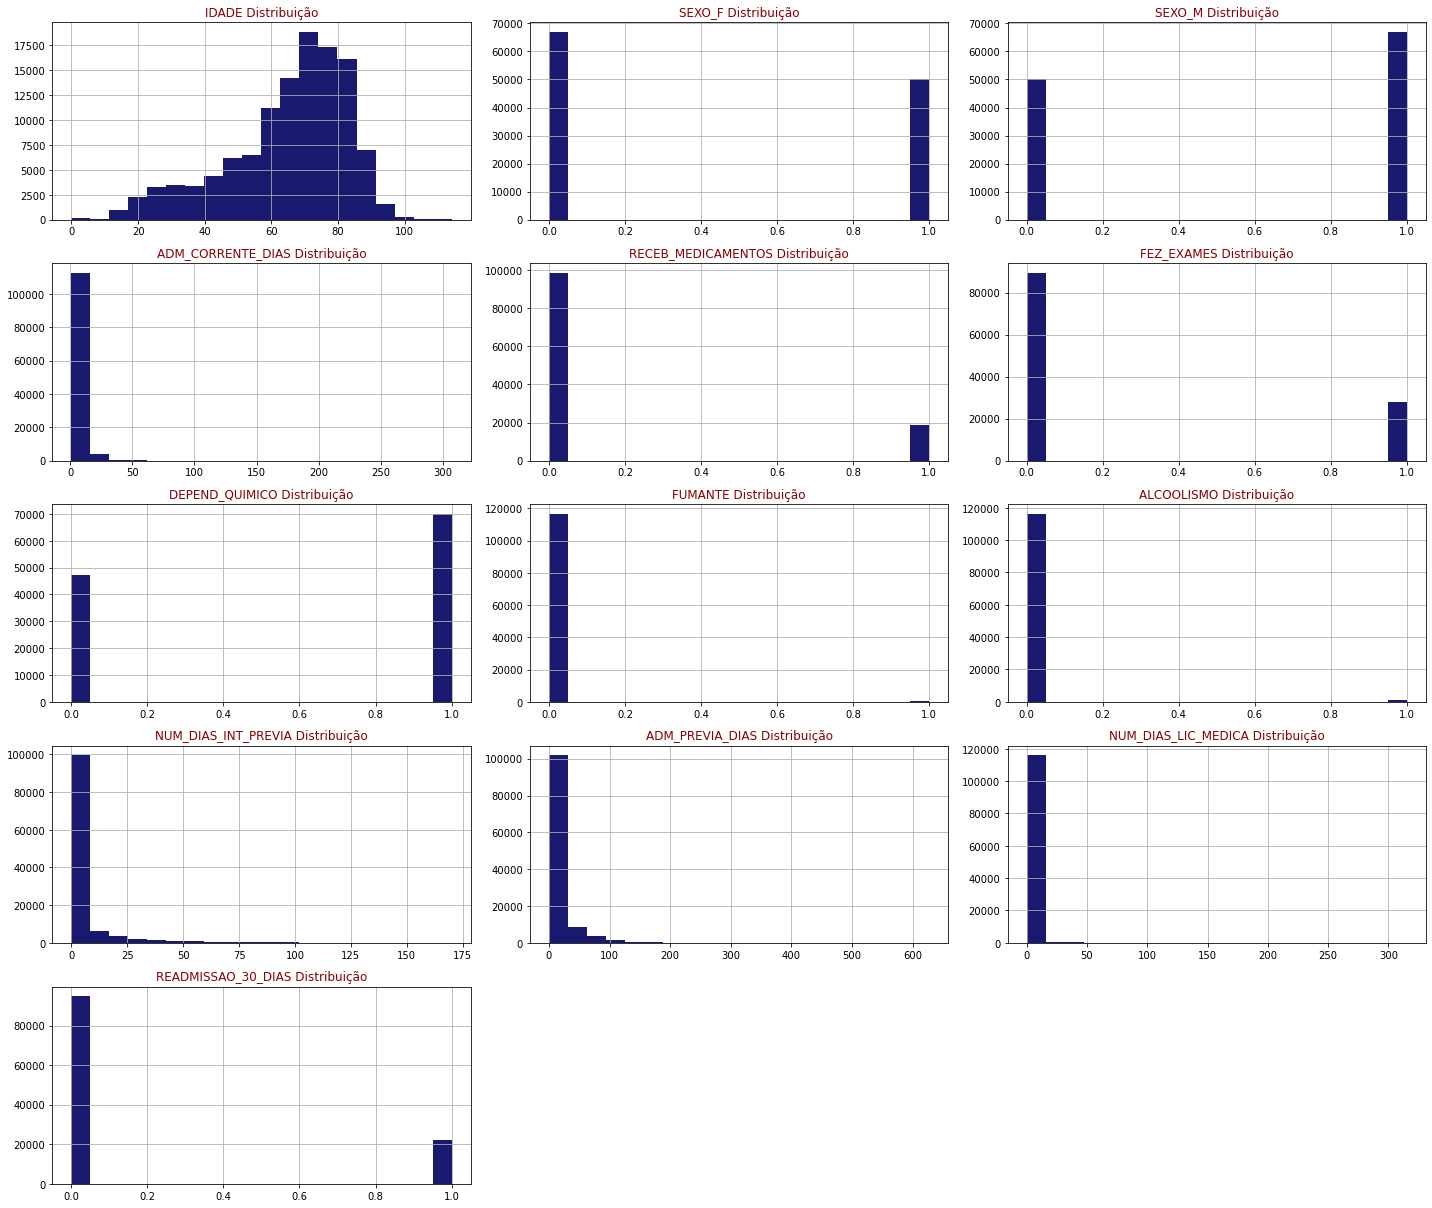

In [ ]:
# Executa a função
cria_histograma(dados, dados.columns, 6, 3)

#### Analise dos histogrmas:

- idade:

a) chama a atenção idades com valor zero, será que criannças com menos de um ano foram internadas? Ou erro de digitação?

b) existem idades maiores que 100. Seráum outlier?

Observe que esses itens a) e b) já apareceram no resumo estatístico(describe)

- sexo_F e sexo_M parecem estar ok

- em realçao a medicamentos parece que a maioria dos pacientes nao recebeu medicamento e a maioria também nao fez exames, será que está correto?

- na variavel dependente quimico cham a atenção que o grafico diz que a maioria é dependente quimico. Porém a pergunta que fica é dependente de que, remedios, drogas?

- nesse dataset diz que a maioria nao fuma e a maioria também não bebe. isso leva a inferir(semprovas) que talvez a depdendencia quimica vista anteriormentye seja de remedios mesmo... mas nao temos certeza. Geralmente quem usa drogas também fuma e bebe, ou pelo menos um dos dois...



- READMISSAO_30_DIAS:

dados desbalanceados, há mais dados em que não ocorreram readmissão

### Checando Outliers

Um outlier é um ponto ou conjunto de pontos que são muito diferentes de outros pontos, valores extremos. Às vezes, eles podem ser muito altos ou muito baixos. Geralmente, é uma boa ideia detectar e remover os valores discrepantes.

Os valores discrepantes são uma das principais razões para um modelo menos preciso.

Por isso, é uma boa ideia removê-los.

Na estatística descritiva, um gráfico de caixa (Boxplot) é um método para representar graficamente grupos de dados numéricos através de seus quartis. Os gráficos de caixa também podem ter linhas que se estendem verticalmente (ou horizontalmente) a partir das caixas (bigodes), indicando variabilidade fora dos quartis superior e inferior. Os outliers podem ser plotados como pontos individuais.

A definição acima sugere que, se houver um outlier, ele será plotado como ponto no boxplot.

O gráfico abaixo mostra dois pontos bem acima de 100 anos, estes são outliers, pois não estão incluídos na caixa, ou seja, nenhum lugar perto dos quartis. O mesmo raciocínio para os pontos abaixo de 20 anos.

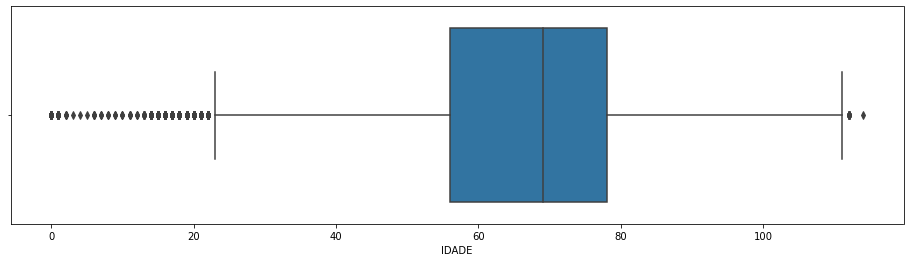

In [ ]:
# Visualizando os outliers da variável IDADE
sns.boxplot(x = dados['IDADE'])
plt.show()

Vamos tomar uma decisao aqui: Vamos retirar todas as linhas que tenham idade maior que 110 anos e menor que 5 anos.

Vamos testar assimj, se necessário, apos abvaliar o modelo podemos voltar e incluir esses dados ou aumentar o range de dados

In [ ]:
outliers_idade = dados[(dados['IDADE']> 110) | (dados['IDADE']<5)]
outliers_idade.head()

,IDADE,SEXO_F,SEXO_M,ADM_CORRENTE_DIAS,RECEB_MEDICAMENTOS,FEZ_EXAMES,DEPEND_QUIMICO,FUMANTE,ALCOOLISMO,NUM_DIAS_INT_PREVIA,ADM_PREVIA_DIAS,NUM_DIAS_LIC_MEDICA,READMISSAO_30_DIAS
ID,,,,,,,,,,,,,
5204,0.0,0,1,3,1,0,0,0,0,0,0,0,0
9588,0.0,1,0,1,0,1,0,0,0,0,0,0,0
12103,2.0,1,0,1,1,0,0,0,0,1,3,0,0
19961,0.0,0,1,13,0,0,1,0,0,0,0,0,0
21779,0.0,0,1,2,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
123922,0.0,1,0,3,0,0,1,0,0,0,0,0,0
124137,0.0,0,1,7,1,0,0,0,0,0,0,0,0
126609,0.0,1,0,2,0,0,1,0,0,0,0,0,0


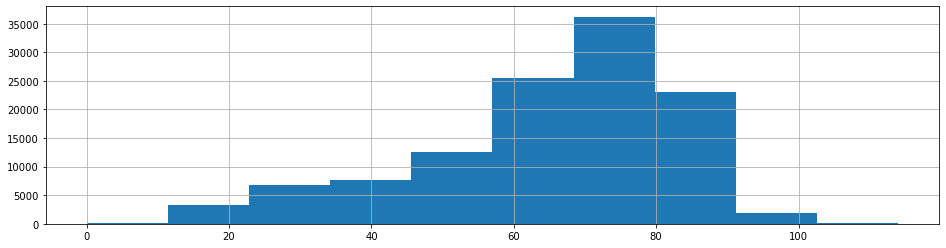

In [ ]:
#Histograma antes da retirda
dados.IDADE.hist();

In [ ]:
dados = dados.drop(outliers_idade.index)

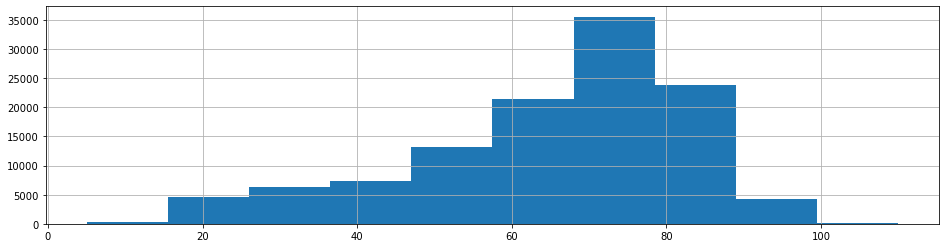

In [ ]:
#Histograma apos  retirada
dados.IDADE.hist();

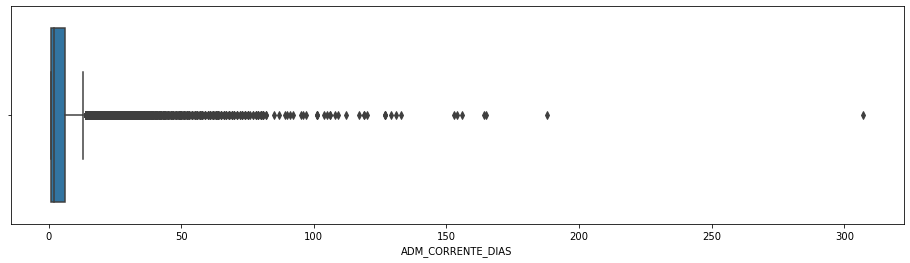

In [ ]:
# Visualizando os outliers da variável ADM_CORRENTE_DIAS
sns.boxplot(x = dados['ADM_CORRENTE_DIAS'])
plt.show()

In [ ]:
#Vamos remover outliers:

dados = dados.drop(dados[(dados['ADM_CORRENTE_DIAS']>180)].index)